<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Creating-a-developer-Project" data-toc-modified-id="Creating-a-developer-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Creating a developer Project</a></span><ul class="toc-item"><li><span><a href="#CJA-API" data-toc-modified-id="CJA-API-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>CJA API</a></span></li><li><span><a href="#Adding-Product-Admin-Right" data-toc-modified-id="Adding-Product-Admin-Right-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Adding Product Admin Right</a></span></li><li><span><a href="#Adobe-Experience-Platform-API" data-toc-modified-id="Adobe-Experience-Platform-API-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Adobe Experience Platform API</a></span></li></ul></li><li><span><a href="#Installing-cjapy-and-aepp" data-toc-modified-id="Installing-cjapy-and-aepp-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Installing cjapy and aepp</a></span><ul class="toc-item"><li><span><a href="#Starting-a-Notebook-or-Lab" data-toc-modified-id="Starting-a-Notebook-or-Lab-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Starting a Notebook or Lab</a></span></li></ul></li><li><span><a href="#Getting-started-with-cjapy" data-toc-modified-id="Getting-started-with-cjapy-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Getting started with cjapy</a></span><ul class="toc-item"><li><span><a href="#Instantiating-the-CJA-API-connection" data-toc-modified-id="Instantiating-the-CJA-API-connection-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Instantiating the CJA API connection</a></span></li><li><span><a href="#Exploring-Data-Views-in-CJA" data-toc-modified-id="Exploring-Data-Views-in-CJA-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Exploring Data Views in CJA</a></span></li></ul></li></ul></div>

In [ ]:
from IPython.display import Image ## Use to display the image
import json ## use later to demonstrate some files

This notebook intends to help familiarizing yourself with the cjapy working elements and the way you can connect to the CJA API and request all sort of data using the different endpoints.\

Some terminology needed to go forward:
* CJA API : The CJA API provide endpoints (URL) associated with certain method type (ex : GET, POST, DELETE) to retrieve data out of a system. In this case: Customer Journey Analytics. 
* cjapy : An open source python module that is wrapping and simplifying access to these API endpoints. It also standardize the response and help by processing some elements. Ex: Returning a pandas dataframe out of request. 
* class : A class is an programming entity that can create multiple children of itself (not always). In cjapy, the CJA class can generate more than one instance of itself when call. 
* Methods : Once you have instantiated a class, you have access to the methods that this class possess. 

# Creating a developer Project

This part is purely documentary because everything has been realized before this lab.\
It is used to show you what needs to be done on your own Organization

You will need to head to the Developer Home: <https://developer.adobe.com/console/>

Once in there, select the `Project` tab and Create a new `Empty project`

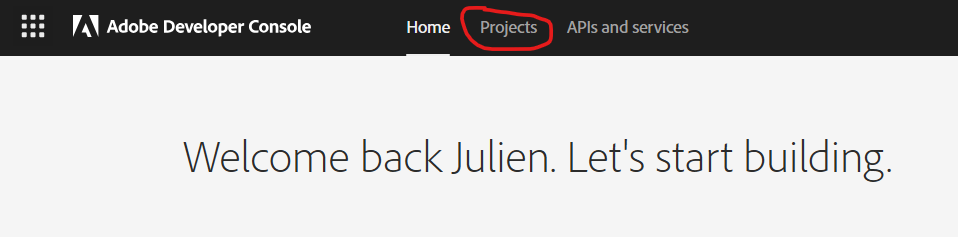

In [2]:
Image(filename="developer-home.png")

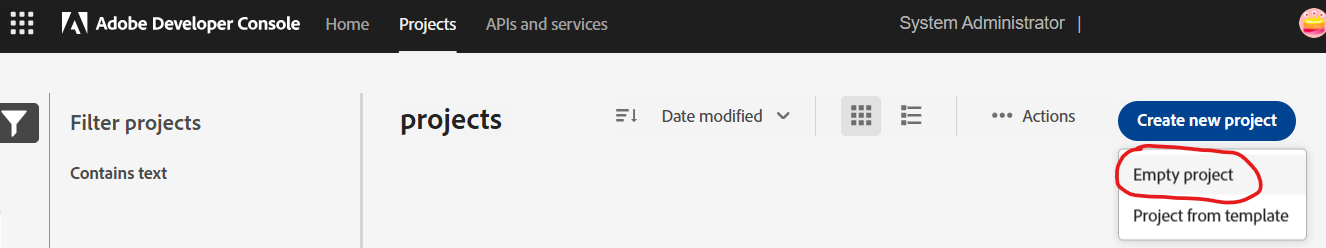

In [3]:
Image(filename="developer-createProject.png")

A project will create a new technical user, this user will need to be connected to some APIs and we need to give him some permissions. 

## CJA API

The first API we want to connect is to Customer Journey Analytics API.\
For that to happen, you will need to `add an API` to your new empty project.\
<span style="color:blue">Note</span> that there is an EDIT button where you can change the name of your project, mine is now called `Adobe Summit 2025`

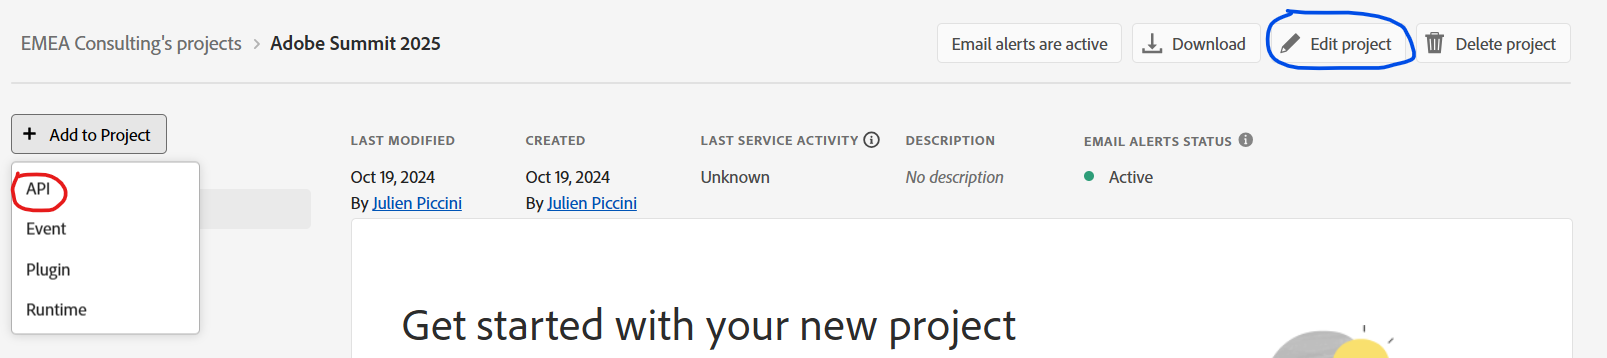

In [4]:
Image(filename="developer-addAPI.png")

In our case, we will select the Customer Journey Analytics API.\
<span style="color:blue">Note</span> that the API is integrated in the `Experience Cloud Component`.

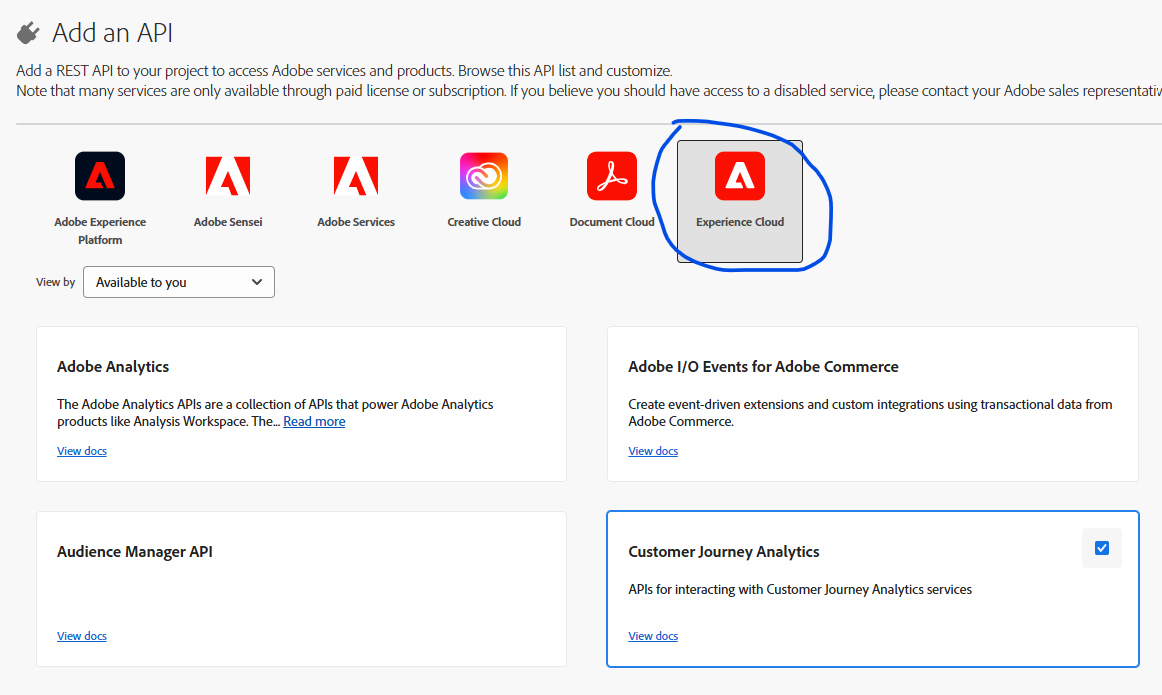

In [5]:
Image(filename="developer-addAPI-CJA.png")

Once you have added this API, you will need to choose your authentication method.\
The default and supported authentication is the "Oauth v2", so please select it.\
Also <span style="color:blue">provide a name</span> or remember the one suggested to your credential, it will be used later for permission.

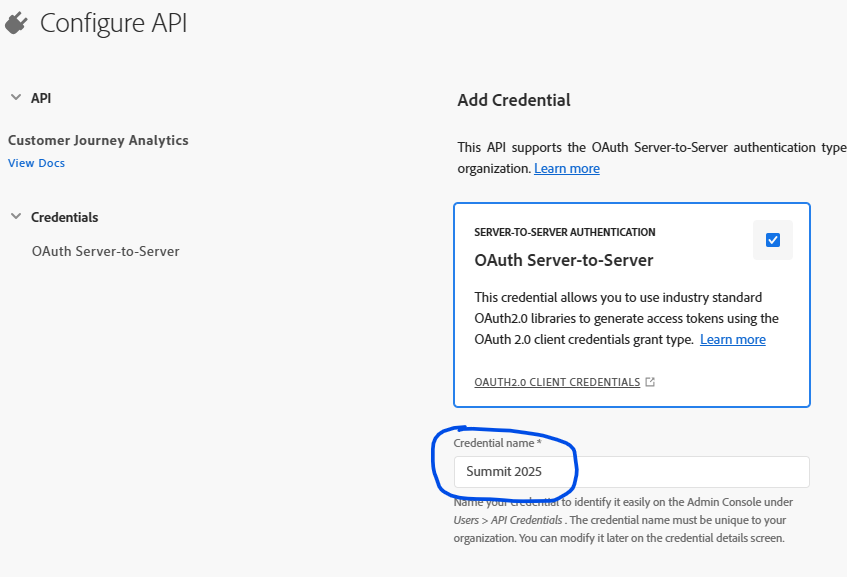

In [6]:
Image(filename="developer-addAPI-authentication.png")

Once you have selected your authentication method, you can then add the Product Profiles.\
The product profiles provide the permission to use CJA.\
It will give the possibility such or such capabilities. It is important that you are aligning on the permission needed for your API with your Product Administrator.\
You can refer to this article from Bian Au on which permissions are necessary: [Adobe Experience Platform Crash Course for Adobe Customer Journey Analytics Product Administrators](https://experienceleaguecommunities.adobe.com/t5/adobe-analytics-blogs/adobe-experience-platform-crash-course-for-adobe-customer/ba-p/710707)

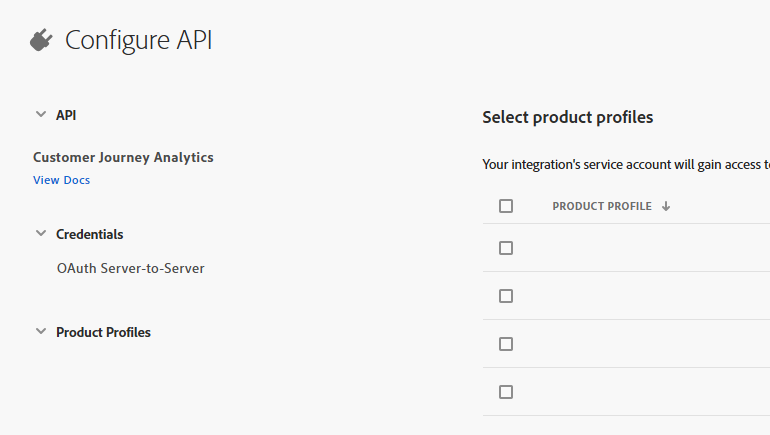

In [7]:
Image(filename="developer-addAPI-permissions.png")

Once this setup has been established you can view your API in the left rail.

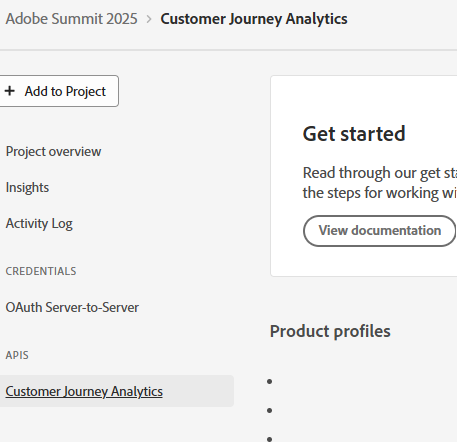

In [8]:
Image(filename="developer-addAPI-cja-overview.png")

## Adding Product Admin Right

As explained at the beginning of the notebook, adding a new project is adding a new technical user.\
The technical user information can be seen when clicking on the `Oauth Server-to-Server` element.\
In order to provide Product Admin right for that API credential, you can take The technical Account Email and add it to the Product Admin section of your Product, Customer Journey Analytics in that example.

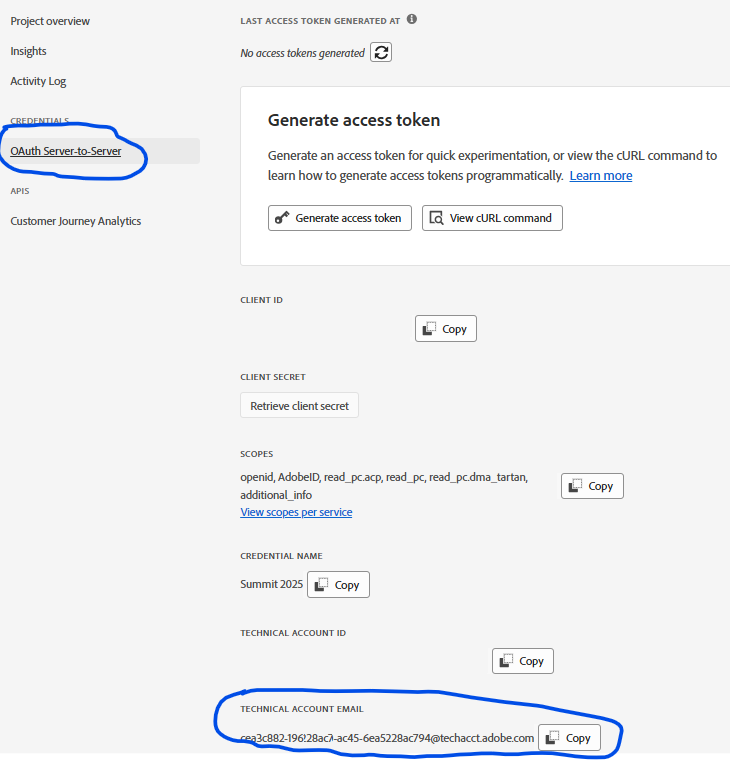

In [9]:
Image(filename="developer-addAPI-CJA-credential.png")

The addition of the credential to the Product Admin section of the Admin Section needs to be review with your Product Administrator.

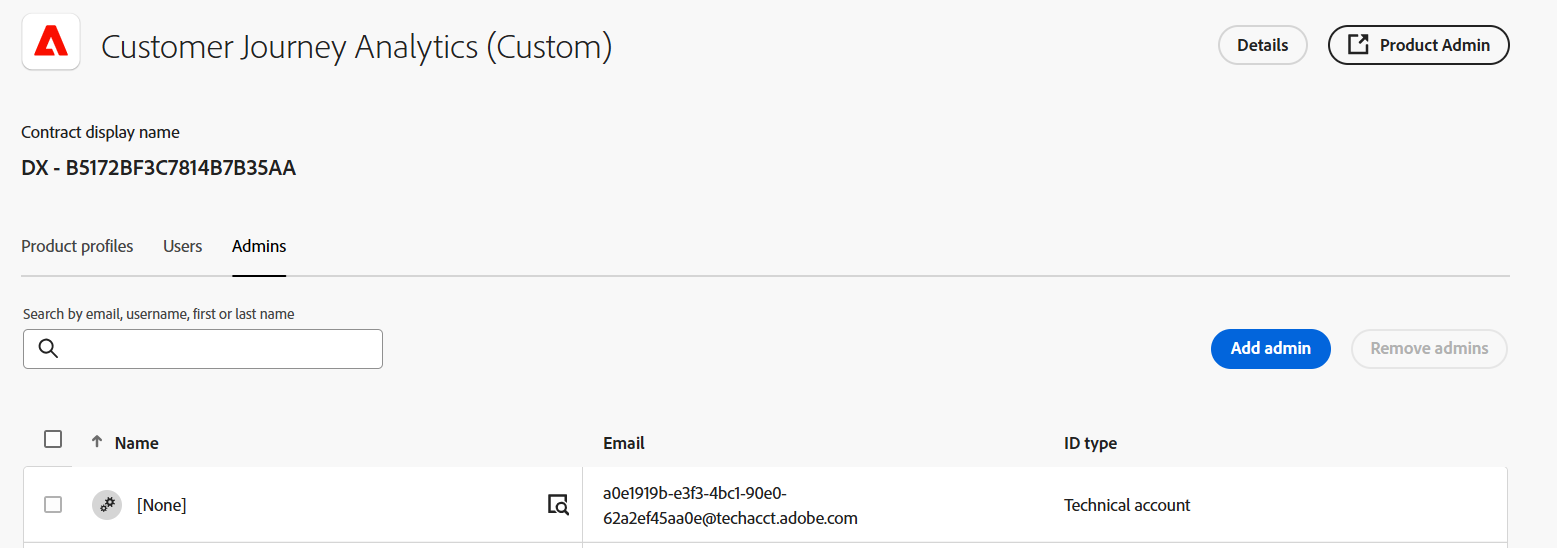

In [10]:
Image(filename="CJA-product-admin.png")

## Adobe Experience Platform API

As you may be aware or if you have just read Brian article, we will need to add AEP API as well to have a complete view of the system in CJA.\
We will also need to have additional permission than the one used in Brian article in order to ingest data later.\
We will do that in the next following steps.

The process is the same as you will need to add an API **to the same project**, and this time you will just need to add the AEP API in the offer selection.

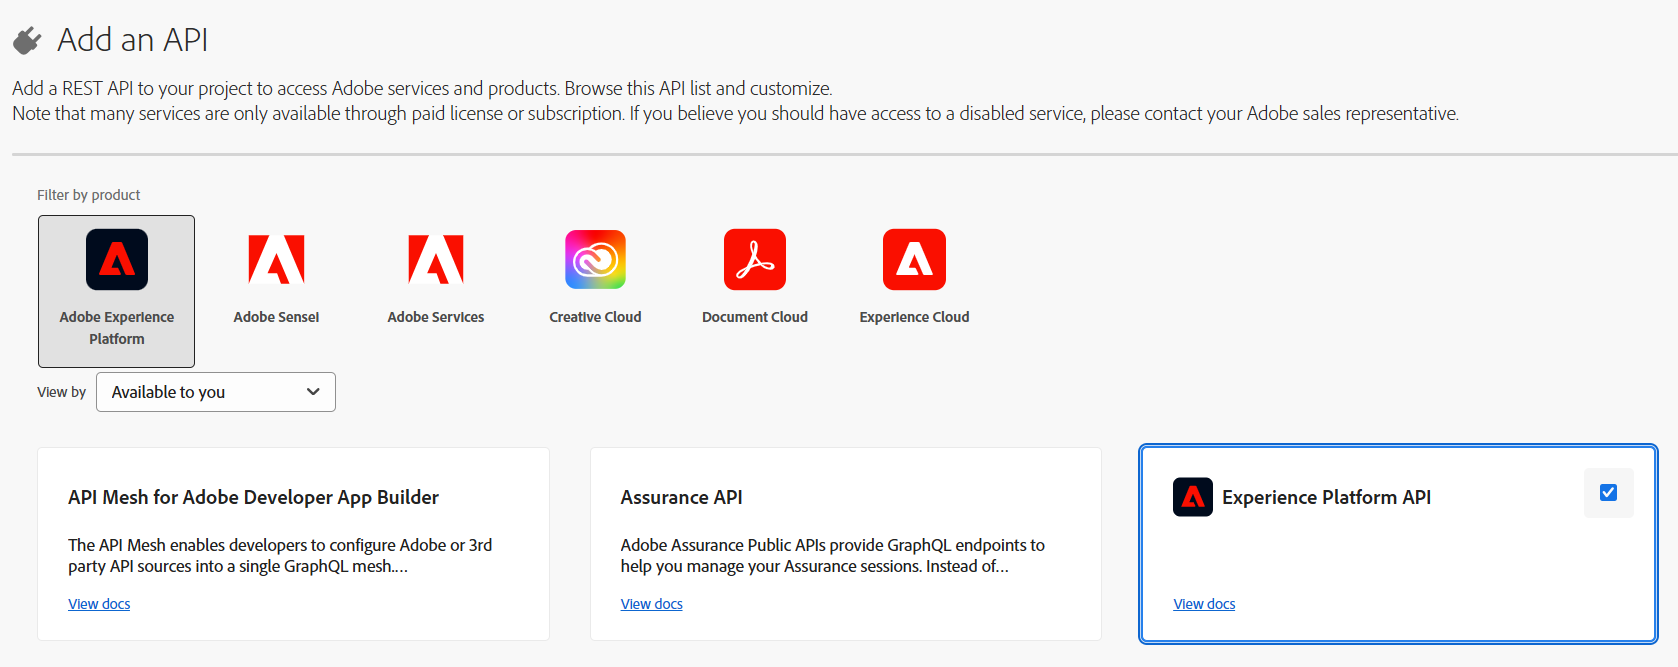

In [11]:
Image(filename="developer-addAPI-AEP.png")

However, when coming to the Product Profile, you will need to just add a single Product Profile: `AEP-default-All-Users`\
The reason is that the permission for AEP is handled in a different interface and not with Product Profile but with roles.

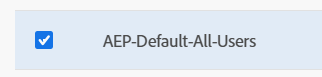

In [12]:
Image(filename="developer-addAPI-AEP-product-profile.png")

For the remaining of the section, only System Administrator can manage permissions of the APIs in Adobe Experience Platform interface.\
In case, you are not a system administrator, you will need to get the help of one to continue this configuration.\

A System Administrator will get the following view on the permissions table.\
(S)He will need to select the `API credential` element to find the project you have created.\
The name you will be able to find is the one defined at the moment of the Oauth selection, in my case: `Summit 2025` 

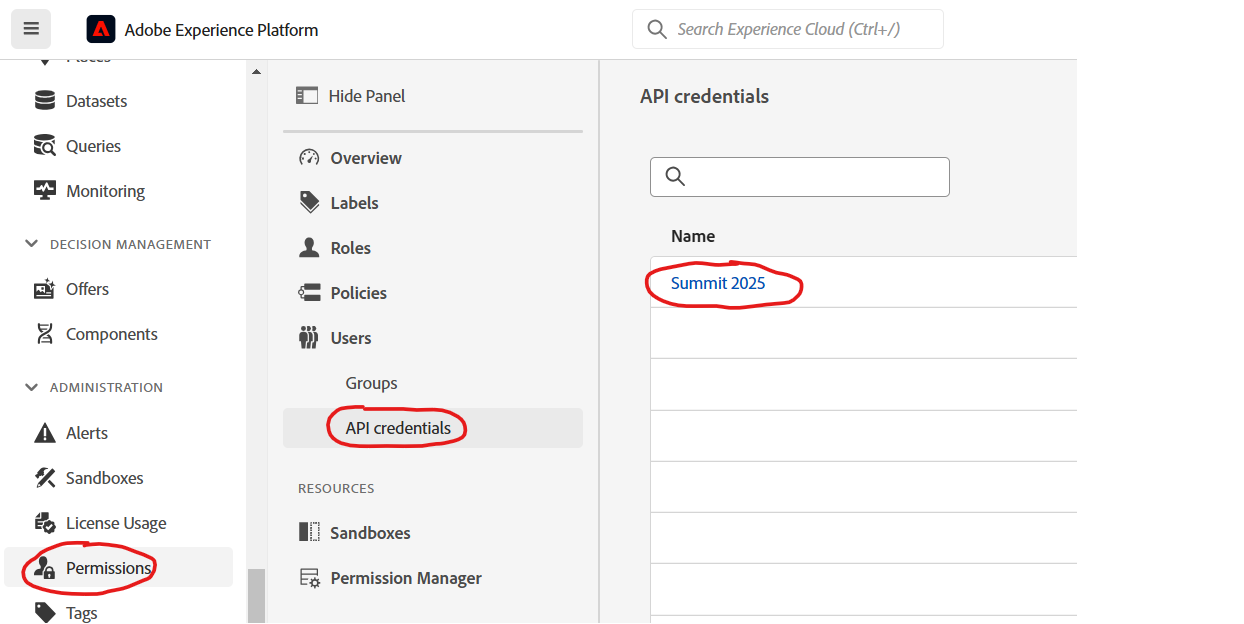

In [13]:
Image(filename="developer-addAPI-AEP-permissions1.png")

Once this element has been selected, roles can be assigned to this Technical User the same way than you can do it for regular users. 

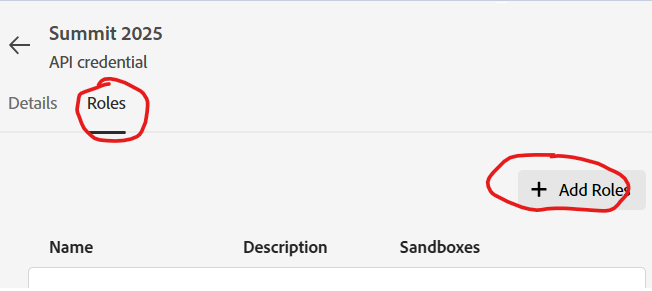

In [14]:
Image(filename="developer-addAPI-AEP-permissions2.png")

In order to cover the whole excercies that we are going to realize in these notebooks, you will need access to the following elements:
* Schema
* Dataset
* Data Ingestion

# Installing cjapy and aepp

This part will cover on how to start with cjapy and aepp module on your machine.\
Note: We will realize these operation on a windows machine, for the Mac users, some similar method exists and are also documented on the internet. It is related to install packages in your machine.\
**Prerequisite**: 

On this repository, you will find a list of required module to install on your machine.

In [1]:
import pathlib
with open(pathlib.Path('../requirements.txt'), 'r') as f:
    for line in f:
        print(line.strip())

cjapy>=0.2.4
matplotlib
numpy
pandas
plotly
PyJWT
requests
scikit_learn
bokeh
seaborn
aepp>=0.3.9
openpyxl
notebook
jupyter
prophet
ipython
statsmodels
arch
pytz


This file can be directly executed this file in your command line via this command:\
`pip install -r requirements.txt --user`\
**Note** : be sure to execute this command line once your command line is located in your folder where the `requirements.txt` file is located.

## Starting a Notebook or Lab

Once everything has been installed and you have everything available on your path environment, you can start calling a `Jupyter notebook` or `Jupyter lab` in your terminal.\

We recommend to realize this step in a <span style="color:blue">dedicated folder</span> so everything that is used as input or for output is grouped.

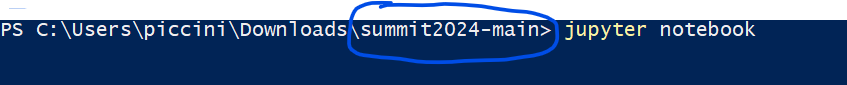

In [16]:
Image(filename="jupyter_notebook.png")

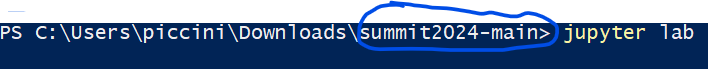

In [17]:
Image(filename="jupyter_lab.png")

# Getting started with cjapy

For querying the CJA Reporting API, we utilize the `cjapy` library and once you have loaded it you can create a config file and provide the following element to that config file.

Ensure you have a `python_config.json` file prepared with the following credentials:
- `org_id`: Your Adobe Org ID.
- `client_id`: The client ID provided by Adobe.
- `secret`: Your client secret.
- `scopes`: The scopes of your API.

The credential can be found on your project, in the Oauth section

Code example

In [ ]:
import cjapy
# cjapy.createConfigFile('myconfig.json')

Once you have created a notebook and your configuration is setup, you can import it directly in this notebook.

In [ ]:
cjapy.importConfigFile('myconfig.json')

## Instantiating the CJA API connection

Once the module has been imported, and the config file, you can instantiate a connection to the CJA API.\
This will generate a token and keep it live. 

In [ ]:
# Instantiate cjapy
cja = cjapy.CJA()

## Exploring Data Views in CJA

Once our credentials are set, the next logical step is to identify the Data Views available to us in Customer Journey Analytics (CJA). Data Views are essentially lenses through which we can examine our collected data, each configured with specific dimensions and metrics to suit various analysis needs.

In [ ]:
# Retrieve a list of all available Data Views
data_views = cja.getDataViews()

# Print each Data View's name and ID for easy identification
print("Available Data Views:")
data_views[['name','id']]

Selecting a specific data view

In [ ]:
data_views.at[data_views[data_views['name']=='Adobe Store - Prod'].index[0],'id']